In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc

configs = {
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'font.sans-serif': ['Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    # 'mathtext.fontset': 'cm',
    "font.size": 14,
    # 'axes.labelsize': 'large',
    # 'axes.labelpad': 8.0,
    # 'xtick.major.pad': 9.0,
}
rc.update(configs)

In [126]:
jac = np.load("./runs/research-on-ntk/jac-3900-0.npy")
ntk = np.einsum('Na,Ma->NM', jac, jac)
diag = np.einsum('Na,Na->N', jac, jac)
bs = 256

In [127]:
np.sum(diag) / ntk.shape[0]

4.185330102680832e-06

In [128]:
np.sum(diag[np.random.choice(ntk.shape[0], bs)]) / bs

4.076242021255894e-06

(array([323137.48501426, 273769.25813708, 179520.82500792,  49368.239774  ,
         31416.13616932,  49368.239774  ,  26928.13078582,  26928.11671656,
          8976.04359527,  17952.07781104,   8976.03890552,   8976.04828503,
          8976.03890552,      0.        ,  17952.09657006,  13464.05835828,
         26928.11671656,  35904.19314012,  31416.10334111,   8976.04828503]),
 array([4.32248044e-07, 1.30262060e-06, 2.17299316e-06, 3.04336572e-06,
        3.91373806e-06, 4.78411084e-06, 5.65448318e-06, 6.52485551e-06,
        7.39522829e-06, 8.26560063e-06, 9.13597341e-06, 1.00063462e-05,
        1.08767181e-05, 1.17470909e-05, 1.26174637e-05, 1.34878355e-05,
        1.43582083e-05, 1.52285811e-05, 1.60989530e-05, 1.69693267e-05,
        1.78396986e-05]),
 <BarContainer object of 20 artists>)

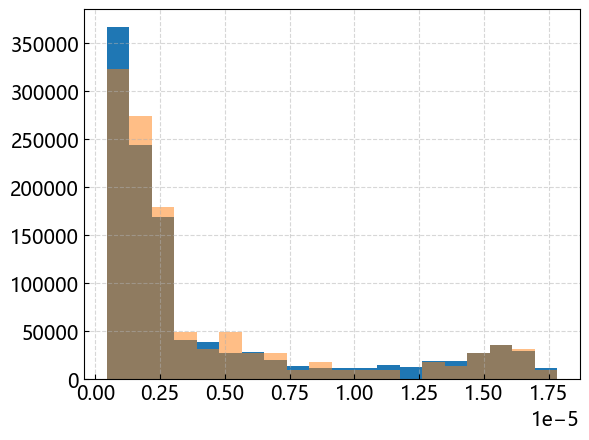

In [129]:
plt.hist(diag, bins=20, density=True)
plt.hist(diag[np.random.choice(ntk.shape[0], bs)], bins=20, density=True, alpha=0.5)

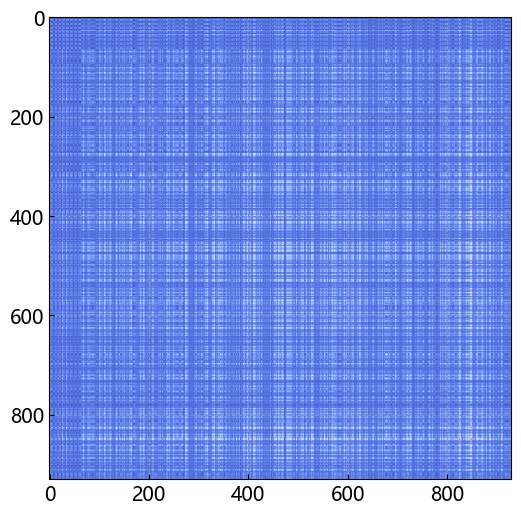

In [115]:
plt.figure(figsize=(6, 6))
plt.imshow(ntk, cmap='coolwarm')